##  <p style="text-align:center; color:red; font-size:24px; font-weight:bold;"> ERUPTION_CLASSIFICATION</p>

## Objective

The objective is to build a machine learning model that predicts the eruption_category of a volcanic event based on other features in the dataset. For instance, given details like the volcano's location, start date, and other characteristics, the model will classify whether the eruption is Confirmed or some other category.

##  <h4 style="color:blue;"> Import Libraries And Load Data</h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("eruptions.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


In [5]:
df.tail()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
11173,324020,Craters of the Moon,21101,Confirmed Eruption,Sunset cone,0.0,-10060.0,NaN,NaN,Radiocarbon (uncorrected),NaN,NaN,NaN,43.420,-113.500
11174,222161,Igwisi Hills,22141,Confirmed Eruption,NE Volcano,1.0,-10450.0,NaN,NaN,Surface Exposure,NaN,NaN,NaN,-4.889,31.933
11175,357121,Quetrupillan,22351,Confirmed Eruption,NaN,3.0,-10658.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722
11176,357121,Quetrupillan,22352,Confirmed Eruption,NaN,3.0,-11345.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722
11177,390090,Saunders,21099,Confirmed Eruption,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-57.800,-26.483


## <h4> Exploratory Data Analysis (EDA) </h4>

In [6]:
df.columns

Index(['volcano_number', 'volcano_name', 'eruption_number',
       'eruption_category', 'area_of_activity', 'vei', 'start_year',
       'start_month', 'start_day', 'evidence_method_dating', 'end_year',
       'end_month', 'end_day', 'latitude', 'longitude'],
      dtype='object')

In [7]:
df.shape

(11178, 15)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volcano_number,11178.0,300284.371176,52321.193203,210010.00,263310.000,290050.000,343030.000,600000.000
eruption_number,11178.0,15666.905439,3297.612433,10001.00,12817.250,15650.500,18463.750,22355.000
vei,8272.0,1.947897,1.161098,0.00,1.000,2.000,2.000,7.000
start_year,11177.0,622.848260,2482.174317,-11345.00,680.000,1847.000,1950.000,2020.000
start_month,10985.0,3.450888,4.071419,0.00,0.000,1.000,7.000,12.000
start_day,10982.0,7.015025,9.645386,0.00,0.000,0.000,15.000,31.000
end_year,4332.0,1917.326639,157.646408,-475.00,1895.000,1957.000,1992.000,2020.000
end_month,4329.0,6.220836,3.686128,0.00,3.000,6.000,9.000,12.000
end_day,4326.0,13.315996,9.831282,0.00,4.000,15.000,21.000,31.000
latitude,11178.0,16.865778,30.761752,-77.53,-6.102,17.600,40.821,85.608


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

In [10]:
df.dtypes

volcano_number              int64
volcano_name               object
eruption_number             int64
eruption_category          object
area_of_activity           object
vei                       float64
start_year                float64
start_month               float64
start_day                 float64
evidence_method_dating     object
end_year                  float64
end_month                 float64
end_day                   float64
latitude                  float64
longitude                 float64
dtype: object

In [11]:
df.isnull().sum()

volcano_number               0
volcano_name                 0
eruption_number              0
eruption_category            0
area_of_activity          6484
vei                       2906
start_year                   1
start_month                193
start_day                  196
evidence_method_dating    1280
end_year                  6846
end_month                 6849
end_day                   6852
latitude                     0
longitude                    0
dtype: int64

## <h4 style="color:green;">Droping columns and filling mising values</h4>

In [12]:
# Drop columns with excessive missing data
df1 = df.drop(columns=['area_of_activity', 'end_year', 'end_month', 'end_day'])

# Impute missing values for VEI with the median
df1['vei'] = df1['vei'].fillna(df1['vei'].median())

# Impute start_month and start_day with the mode
df1['start_month'] = df1['start_month'].fillna(df1['start_month'].mode()[0])
df1['start_day'] = df1['start_day'].fillna(df1['start_day'].mode()[0])

# Impute evidence_method_dating with the mode
df1['evidence_method_dating'] = df1['evidence_method_dating'].fillna(df1['evidence_method_dating'].mode()[0])

# Drop rows with remaining missing values
df1 = df1.dropna()


In [13]:
df1.isnull().sum()

volcano_number            0
volcano_name              0
eruption_number           0
eruption_category         0
vei                       0
start_year                0
start_month               0
start_day                 0
evidence_method_dating    0
latitude                  0
longitude                 0
dtype: int64

In [14]:
df1.duplicated().sum()

0

## <h2 style="color:red;">Dividing df into categorical and numerical columns </h2>

## <h4> Categorical columns as cat_cols </h4>

In [15]:
cat_cols=df1.select_dtypes(include="object")
cat_cols

,volcano_name,eruption_category,evidence_method_dating
0,Soputan,Confirmed Eruption,Historical Observations
1,San Miguel,Confirmed Eruption,Historical Observations
2,"Fournaise, Piton de la",Confirmed Eruption,Historical Observations
3,Rincon de la Vieja,Confirmed Eruption,Historical Observations
4,Fernandina,Confirmed Eruption,Historical Observations
...,...,...,...
11172,Nemrut Dagi,Confirmed Eruption,Varve Count
11173,Craters of the Moon,Confirmed Eruption,Radiocarbon (uncorrected)
11174,Igwisi Hills,Confirmed Eruption,Surface Exposure
11175,Quetrupillan,Confirmed Eruption,Radiocarbon (corrected)


In [16]:
target_value_count = df1["eruption_category"].value_counts()

In [17]:
target_value_count

eruption_category
Confirmed Eruption      9899
Uncertain Eruption      1112
Discredited Eruption     166
Name: count, dtype: int64

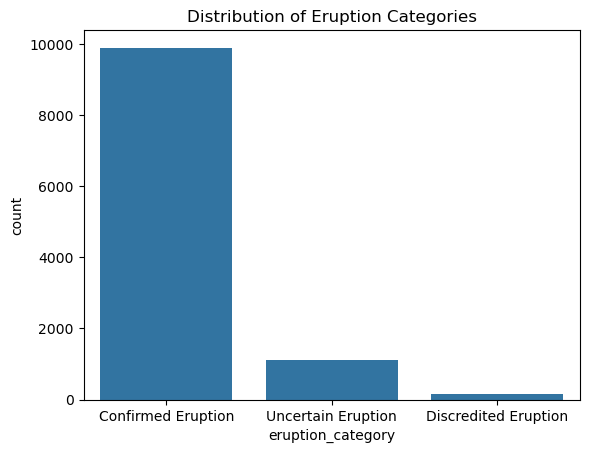

In [18]:
# Plot distribution of the target variable
sns.countplot(data=df1, x='eruption_category')
plt.title('Distribution of Eruption Categories')
plt.show()

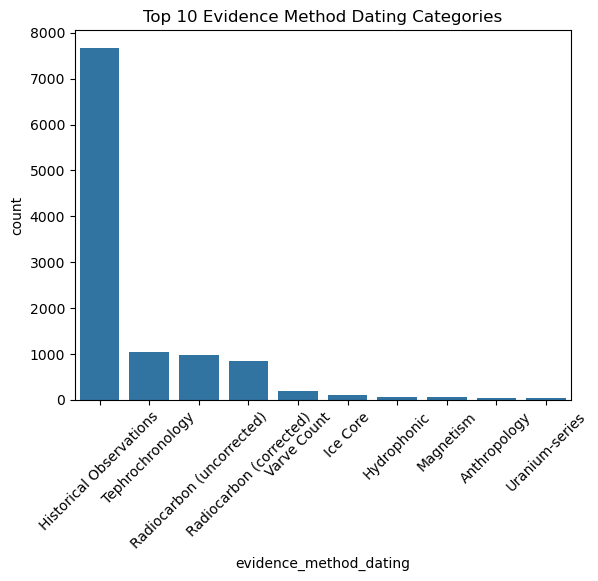

In [19]:
# sns.countplot(x=df1['evidence_method_dating'])
# plt.title('Distribution of Evidence Method Dating')
# plt.xticks(rotation=45)  # Rotate labels for better readability if needed
# plt.show()

# Calculate the value counts for evidence_method_dating
top_10_categories = df1['evidence_method_dating'].value_counts().head(10).index

# Filter the dataset to include only the top 10 categories
filtered_df = df1[df1['evidence_method_dating'].isin(top_10_categories)]

# Plot the countplot
sns.countplot(x='evidence_method_dating', data=filtered_df, order=top_10_categories)
plt.title('Top 10 Evidence Method Dating Categories')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()



In [20]:
irrelevant_columns = ['volcano_number', 'eruption_number', 'volcano_name','vei']
df2=df1.drop(columns=irrelevant_columns)

In [21]:
df2.head()

,eruption_category,start_year,start_month,start_day,evidence_method_dating,latitude,longitude
0,Confirmed Eruption,2020.0,3.0,23.0,Historical Observations,1.112,124.737
1,Confirmed Eruption,2020.0,2.0,22.0,Historical Observations,13.434,-88.269
2,Confirmed Eruption,2020.0,2.0,10.0,Historical Observations,-21.244,55.708
3,Confirmed Eruption,2020.0,1.0,31.0,Historical Observations,10.830,-85.324
4,Confirmed Eruption,2020.0,1.0,12.0,Historical Observations,-0.370,-91.550


## <h4> Numerical columns as num_cols </h4>

In [22]:
num_cols=df2.select_dtypes(include=["int64","float64"])
num_cols

,start_year,start_month,start_day,latitude,longitude
0,2020.0,3.0,23.0,1.112,124.737
1,2020.0,2.0,22.0,13.434,-88.269
2,2020.0,2.0,10.0,-21.244,55.708
3,2020.0,1.0,31.0,10.830,-85.324
4,2020.0,1.0,12.0,-0.370,-91.550
...,...,...,...,...,...
11172,-9950.0,0.0,0.0,38.654,42.229
11173,-10060.0,0.0,0.0,43.420,-113.500
11174,-10450.0,0.0,0.0,-4.889,31.933
11175,-10658.0,0.0,0.0,-39.496,-71.722


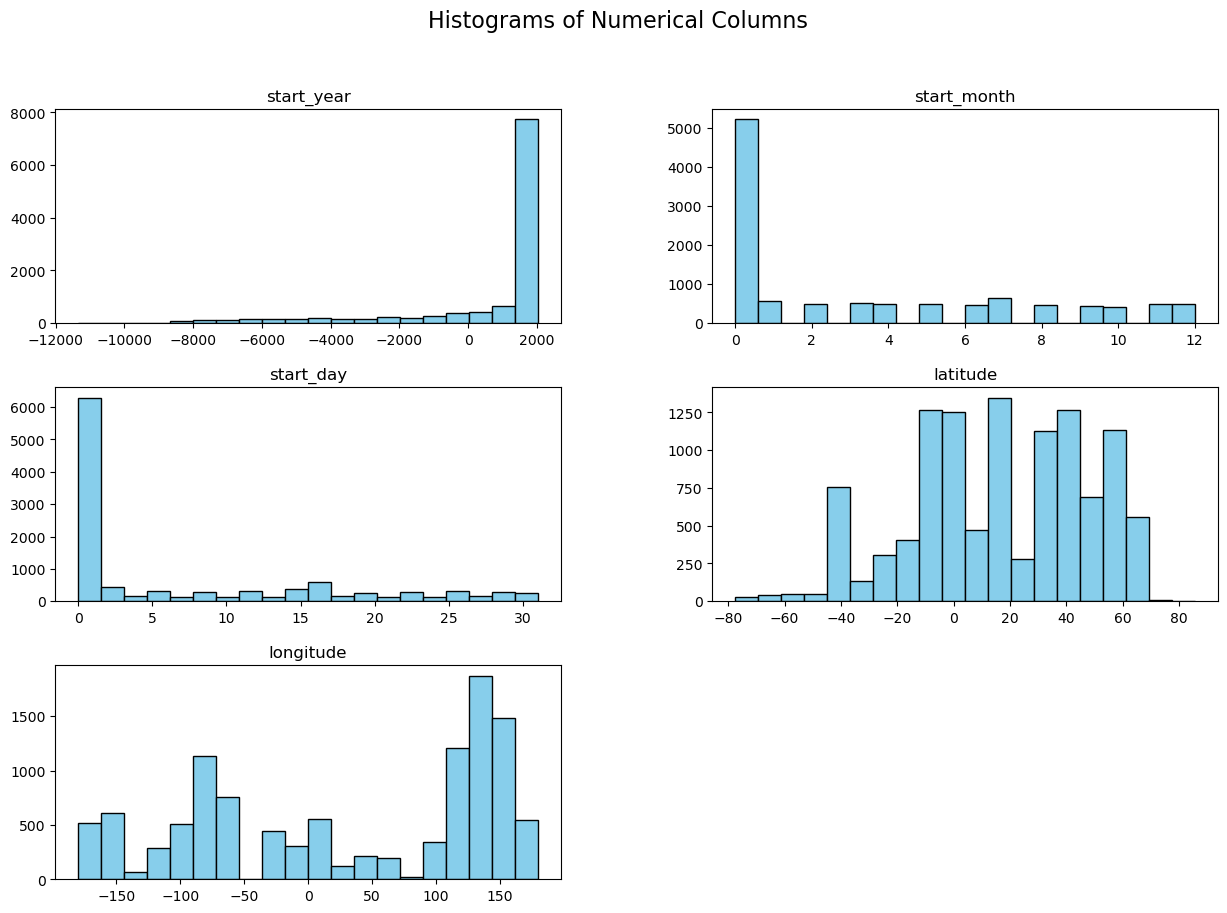

In [23]:
# Plot histograms for numerical columns
num_cols.hist(bins=20, figsize=(15, 10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


## <h4> Checking Outliers </h4>

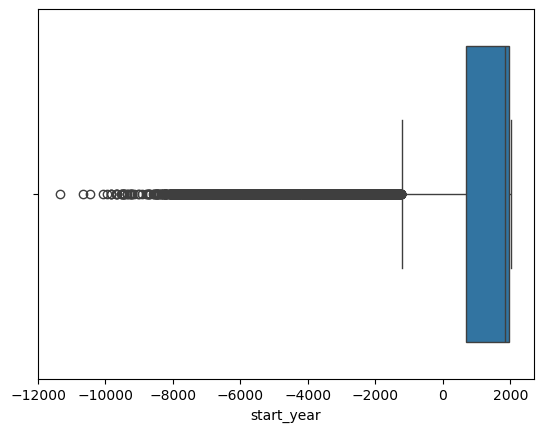

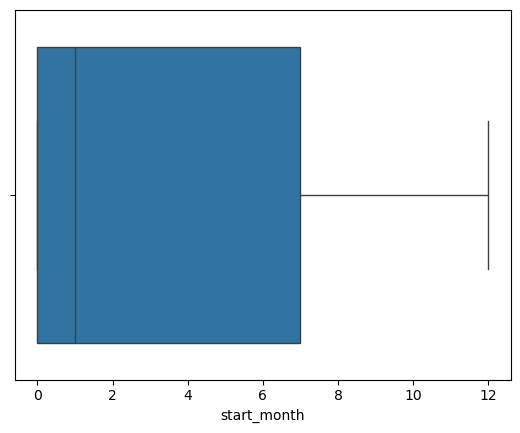

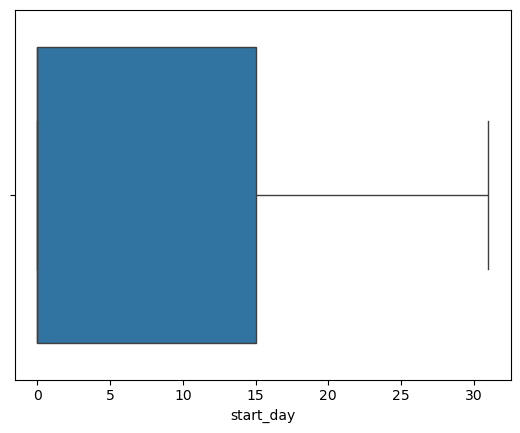

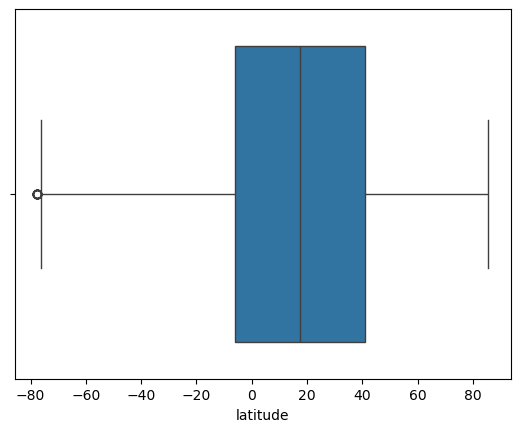

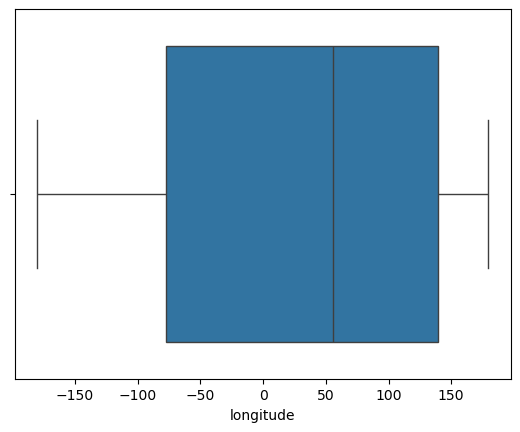

In [24]:
for x in num_cols.columns:
    sns.boxplot(x=df2[x],data=df2)
    plt.show()

In [25]:
df3=df2.copy()

In [26]:
num_cols=df3.select_dtypes(include="number")

In [27]:
#df3[num_cols].skew()

## <h4> Checking Skewness </h4>

In [28]:
#df3.skew()

In [29]:
pt = PowerTransformer(method = 'yeo-johnson')

In [30]:
# check numerical features
numerical_features = df3.select_dtypes(include=['float64', 'int64']).columns

In [31]:
df3[numerical_features] = pt.fit_transform(df3[numerical_features])
df3[numerical_features].skew()

start_year    -1.083932
start_month    0.164580
start_day      0.348644
latitude      -0.257754
longitude     -0.278158
dtype: float64

## <h4> Correlation </h4>

In [32]:
cor=df3[numerical_features].corr()

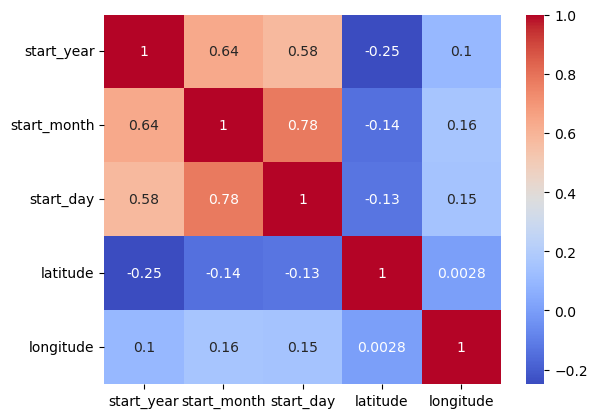

In [33]:
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

## <h4> Label Coding </h4>

In [34]:
cat_cols=df3.select_dtypes(include="object")
cat_cols

,eruption_category,evidence_method_dating
0,Confirmed Eruption,Historical Observations
1,Confirmed Eruption,Historical Observations
2,Confirmed Eruption,Historical Observations
3,Confirmed Eruption,Historical Observations
4,Confirmed Eruption,Historical Observations
...,...,...
11172,Confirmed Eruption,Varve Count
11173,Confirmed Eruption,Radiocarbon (uncorrected)
11174,Confirmed Eruption,Surface Exposure
11175,Confirmed Eruption,Radiocarbon (corrected)


In [35]:
df3.eruption_category.value_counts()

eruption_category
Confirmed Eruption      9899
Uncertain Eruption      1112
Discredited Eruption     166
Name: count, dtype: int64

In [36]:
df3.evidence_method_dating.value_counts()

evidence_method_dating
Historical Observations      7669
Tephrochronology             1046
Radiocarbon (uncorrected)     981
Radiocarbon (corrected)       852
Varve Count                   187
Ice Core                      116
Hydrophonic                    68
Magnetism                      58
Anthropology                   38
Uranium-series                 31
Ar/Ar                          29
Surface Exposure               29
Potassium-Argon                22
Dendrochronology               15
Hydration Rind                 11
Thermoluminescence             11
Uncertain                       6
Seismicity                      3
Fission track                   3
Lichenometry                    2
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the target column
df3['eruption_category'] = label_encoder.fit_transform(df3['eruption_category'])

# Map encoded labels back to original for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Check the updated column
print(df3['eruption_category'].head())


Label Mapping: {'Confirmed Eruption': 0, 'Discredited Eruption': 1, 'Uncertain Eruption': 2}
0    0
1    0
2    0
3    0
4    0
Name: eruption_category, dtype: int32


In [38]:
df3['eruption_category'].value_counts()

eruption_category
0    9899
2    1112
1     166
Name: count, dtype: int64

In [39]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'evidence_method_dating'
df3['evidence_method_dating'] = label_encoder.fit_transform(df3['evidence_method_dating'])

# Map encoded labels back to original for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Check the updated column
print(df3['evidence_method_dating'].head())


Label Mapping: {'Anthropology': 0, 'Ar/Ar': 1, 'Dendrochronology': 2, 'Fission track': 3, 'Historical Observations': 4, 'Hydration Rind': 5, 'Hydrophonic': 6, 'Ice Core': 7, 'Lichenometry': 8, 'Magnetism': 9, 'Potassium-Argon': 10, 'Radiocarbon (corrected)': 11, 'Radiocarbon (uncorrected)': 12, 'Seismicity': 13, 'Surface Exposure': 14, 'Tephrochronology': 15, 'Thermoluminescence': 16, 'Uncertain': 17, 'Uranium-series': 18, 'Varve Count': 19}
0    4
1    4
2    4
3    4
4    4
Name: evidence_method_dating, dtype: int32


In [40]:
df3['evidence_method_dating'].value_counts()

evidence_method_dating
4     7669
15    1046
12     981
11     852
19     187
7      116
6       68
9       58
0       38
18      31
1       29
14      29
10      22
2       15
5       11
16      11
17       6
13       3
3        3
8        2
Name: count, dtype: int64

## <h4> Feature Selection </h4>

In [41]:
X=df3.drop("eruption_category",axis=1)
y=df3["eruption_category"]

In [42]:
sk =  SelectKBest(score_func = f_classif, k = 10)
x_new = sk.fit_transform(X,y)
# Get selected feature names and scores
selected_features = X.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['start_year', 'start_month', 'start_day', 'evidence_method_dating',
       'latitude', 'longitude'],
      dtype='object')

Feature Scores:
                  Feature       Score
3  evidence_method_dating  275.121590
0              start_year  187.011668
1             start_month   12.192555
2               start_day    6.080802
5               longitude    4.042258
4                latitude    1.639481


## <h4> Scaling </h4>

In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 0.78986062,  0.51679191,  1.35161038, -0.61320449, -0.54181587,
         0.80909112],
       [ 0.78986062,  0.24750404,  1.33673721, -0.61320449, -0.13679708,
        -1.04553923],
       [ 0.78986062,  0.24750404,  1.03397899, -0.61320449, -1.23228495,
         0.16907992],
       ...,
       [-2.46038687, -0.99944144, -0.88331111,  1.69159646, -0.73074656,
        -0.04865812],
       [-2.4798514 , -0.99944144, -0.88331111,  1.00015617, -1.78482111,
        -0.91435244],
       [-2.54374054, -0.99944144, -0.88331111,  1.00015617, -1.78482111,
        -0.91435244]])

In [44]:
# Split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)

In [45]:
print(f"x_train:{X_train.shape},x_test:{X_test.shape},y_train:{y_train.shape},y_test:{y_test.shape}")

x_train:(8941, 6),x_test:(2236, 6),y_train:(8941,),y_test:(2236,)


## Model Comparison

In [46]:
models ={
    '1.LogisticRegression':LogisticRegression(),
    '2. SVC':SVC(),
    '3. DecisionTreeClassifier':DecisionTreeClassifier(),
    '4. Randomforest':RandomForestClassifier(),
    '5.Gradient Boosting': GradientBoostingClassifier(),
    '6.AdaBoost': AdaBoostClassifier(),
    '7.Naive Bayes':GaussianNB()
}

In [47]:
results ={}
for name,model in models.items():
    print(f"\nTraining Name{name}--->")
    model.fit(X_train,y_train)
    y_pred    = model.predict(X_test)
    accuracy  = accuracy_score(y_test,y_pred)
    results[name]= {
        'model':model,
        'accuracy':accuracy_score,
        'Report':classification_report(y_test,y_pred)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassificationReport")
    print(results[name]['Report'])
    


Training Name1.LogisticRegression--->
1.LogisticRegression Accuracy: 0.8810

ClassificationReport
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1973
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00       237

    accuracy                           0.88      2236
   macro avg       0.29      0.33      0.31      2236
weighted avg       0.78      0.88      0.83      2236


Training Name2. SVC--->
2. SVC Accuracy: 0.8824

ClassificationReport
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1973
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00       237

    accuracy                           0.88      2236
   macro avg       0.29      0.33      0.31      2236
weighted avg       0.78      0.88      0.83      2236


Training Name3. DecisionTreeClassifier--->
3. DecisionTreeClassifie

## HyperParameter Tuning

In [48]:
# Defining the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

In [49]:
# Defining the hyperparameter space

param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],  # Number of boosting stages
    'max_depth': [3, 5, 10, 15, None],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 15],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],          # Minimum samples required to be a leaf node
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Learning rate
    'subsample': [0.6, 0.8, 1.0],              # Fraction of samples used for fitting the individual base learners
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider for splits
}

#### Using RandomizedSearchCV

In [50]:
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=50,               # Number of random combinations to try
    scoring='f1_weighted',   # Optimize for weighted F1-score
    cv=5,                    # 5-fold cross-validation
    verbose=2,               # Detailed output during training
    random_state=42,
    n_jobs=-1                # Use all available CPU cores
)

In [51]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1_weighted', verbose=2)

#### Best parameters and score

In [52]:
print("Best Parameters:", random_search.best_params_)
print("Best Weighted F1 Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'learning_rate': 0.01}
Best Weighted F1 Score: 0.8757629096462594


#### Best Model

In [53]:
best_model = random_search.best_estimator_

#### Evaluate the best model on the test set

In [54]:
y_pred = best_model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [56]:
print(f"Test Accuracy: {accuracy}")
print(f"Test Weighted F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8828264758497316
Test Weighted F1 Score: 0.865075415770383

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1973
           1       0.33      0.19      0.24        26
           2       0.48      0.24      0.32       237

    accuracy                           0.88      2236
   macro avg       0.58      0.47      0.50      2236
weighted avg       0.86      0.88      0.87      2236

